In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [28]:
City = pd.read_csv("../Pyber/raw_data/city_data.csv")
Ride = pd.read_csv("../Pyber/raw_data/ride_data.csv")
City.head()


,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [29]:
Ride.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [30]:
type(Ride)

pandas.core.frame.DataFrame

In [31]:
type(City)

pandas.core.frame.DataFrame

In [36]:
df = pd.merge(City, Ride, on = "city")
df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [37]:
import pandas as pd

f = {'fare': ['mean'],
     'ride_id': ['count'],
     'driver_count': ['mean']
    }
df_ride = df.groupby(['city','type']).agg(f)
df_ride.reset_index(level=df_ride.index.names, inplace=True)
#df_ride.rename(columns={"city":"City", "type":"City Type", "fare mean":"Average Fare ($)", "ride_id count": "Total Number of rides"})
df_ride.columns = ["City", "Type","Average_Fare","Total_Number_rides","Driver_count"]

df_ride.head()

,City,Type,Average_Fare,Total_Number_rides,Driver_count
0,Alvarezhaven,Urban,23.928710,31,21
1,Alyssaberg,Urban,20.609615,26,67
2,Anitamouth,Suburban,37.315556,9,16
3,Antoniomouth,Urban,23.625000,22,21
4,Aprilchester,Urban,21.981579,19,49


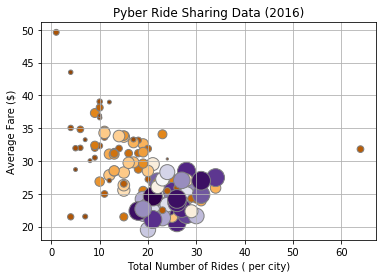

In [38]:
import seaborn as sns
plt.scatter(df_ride['Total_Number_rides'], df_ride['Average_Fare'], c=df_ride['Driver_count'], cmap= "PuOr",
            s=df_ride['Driver_count']*5, edgecolors = "grey")
plt.xlabel("Total Number of Rides ( per city)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.grid()
plt.show()

In [39]:
df_ride['Total_Fare']= df_ride['Average_Fare'] * df_ride['Total_Number_rides']
df_ride['Percent_Fare']= df_ride['Total_Fare'] / sum(df_ride['Total_Fare'])*100
df_ride['Percent_ride'] =df_ride['Total_Number_rides']/sum(df_ride['Total_Number_rides'])*100 
df_ride['Percent_drivers'] =df_ride['Driver_count']/sum(df_ride['Driver_count'])*100 
df_ride.head()

,City,Type,Average_Fare,Total_Number_rides,Driver_count,Total_Fare,Percent_Fare,Percent_ride,Percent_drivers
0,Alvarezhaven,Urban,23.928710,31,21,741.79,1.147054,1.287910,0.628743
1,Alyssaberg,Urban,20.609615,26,67,535.85,0.828603,1.080183,2.005988
2,Anitamouth,Suburban,37.315556,9,16,335.84,0.519321,0.373909,0.479042
3,Antoniomouth,Urban,23.625000,22,21,519.75,0.803707,0.914001,0.628743
4,Aprilchester,Urban,21.981579,19,49,417.65,0.645826,0.789364,1.467066


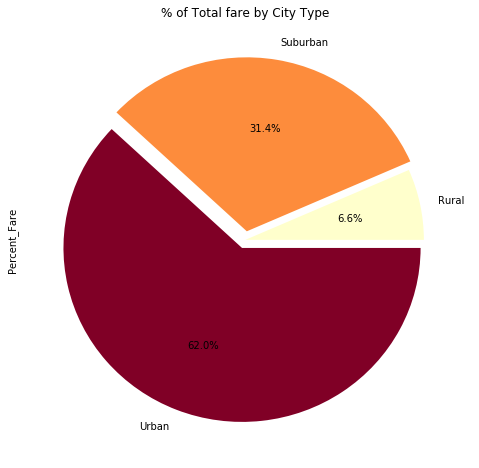

In [40]:
df_percent_fare = df_ride.groupby(['Type']).Percent_Fare.sum()
df_percent_fare = df_percent_fare.to_frame()
#df_percent_fare.reset_index(level=df_percent_fare.index.names, inplace=True)
df_percent_fare
explode = (0, 0.05,0.05)
df_percent_fare['Percent_Fare'].plot(kind='pie', title = '% of Total fare by City Type' ,  cmap= "YlOrRd", explode = explode, autopct = '%1.1f%%', figsize=(8, 8))
plt.show()

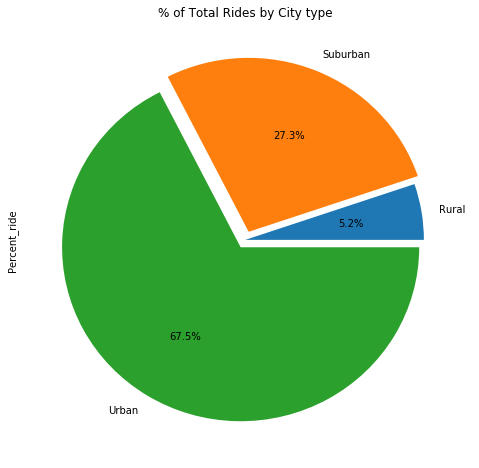

In [16]:
df_percent_ride = df_ride.groupby(['Type']).Percent_ride.sum()
df_percent_ride = df_percent_ride.to_frame()
df_percent_ride['Percent_ride'].plot(kind='pie', title ='% of Total Rides by City type', explode = explode, autopct = '%1.1f%%', figsize=(8, 8)) 
plt.show()

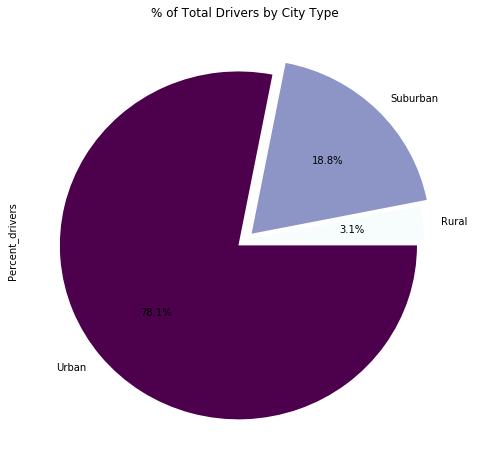

In [17]:
df_percent_drivers = df_ride.groupby(['Type']).Percent_drivers.sum()
df_percent_drivers = df_percent_drivers.to_frame()
df_percent_drivers['Percent_drivers'].plot(kind='pie', title = '% of Total Drivers by City Type', cmap= "BuPu", explode = explode, autopct = '%1.1f%%', figsize=(8, 8))
plt.show()